In [ ]:
# Import
from google.colab import auth
from google.colab import drive
import pandas as pd

# Authenticate
auth.authenticate_user()
drive.mount('/content/drive')

Mounted at /content/drive


## Federal Housing Finance Agency (FHFA) - House Price Index (HPI) Data

### **What does it represent** 

The FHFA HPI is a broad measure of the movement of single-family house prices. The FHFA HPI is a weighted, repeat-sales index, meaning that it measures average price changes in repeat sales or refinancings on the same properties. This information is obtained by reviewing repeat mortgage transactions on single-family properties whose mortgages have been purchased or securitized by Fannie Mae or Freddie Mac since January 1975.

The FHFA HPI serves as a timely, accurate indicator of house price trends at various geographic levels. Because of the breadth of the sample, it provides more information than is available in other house price indexes. It also provides housing economists with an improved analytical tool that is useful for estimating changes in the rates of mortgage defaults, prepayments and housing affordability in specific geographic areas.

### **Based on Quarterly data**

Quarterly Index both seasonally adjusted (index_sa) and non-seasonally adjusted (index_nsa) for a numerical representation of changes in the relative value of a specific set of housing properties over time. It is used to measure changes in the price level of residential properties in a state. 

The HPI index starts at a base value of 100 or 1000 for a specific reference period, which serves as a benchmark. Changes in the index value over time reflect the percentage change in the price level of the housing properties being measured compared to the base period. For example, an HPI index value of 110 for a specific quarter or year would indicate that the housing prices have increased by 10% compared to the base period, while an index value of 90 would indicate a decrease of 10% in prices.

In [ ]:
# Specify the file path of the data file in Google Drive
file_path = '/content/drive/MyDrive/School/MSDS-498 Capstone/Data/fhfa_hpi.csv'  
# Read the data into a pandas DataFrame
df = pd.read_csv(file_path) 

In [ ]:
df_filtered = df[(df['year'] >= 2017) & (df['year'] <= 2022)]
df_filtered

,division,year,qtr,index_po_not_seasonally_adjusted,index_po_seasonally_adjusted
104,DV_ENC,2017,1,192.99,195.00
105,DV_ENC,2017,2,200.53,197.15
106,DV_ENC,2017,3,203.31,200.05
107,DV_ENC,2017,4,202.44,203.11
108,DV_ENC,2018,1,205.24,207.03
...,...,...,...,...,...
1275,USA,2021,4,357.11,358.91
1276,USA,2022,1,373.69,374.30
1277,USA,2022,2,394.09,387.37
1278,USA,2022,3,391.67,387.78


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 104 to 1279
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   division                          240 non-null    object 
 1   year                              240 non-null    int64  
 2   qtr                               240 non-null    int64  
 3   index_po_not_seasonally_adjusted  240 non-null    float64
 4   index_po_seasonally_adjusted      240 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 11.2+ KB


In [ ]:
df_filtered.isnull().sum()

division                            0
year                                0
qtr                                 0
index_po_not_seasonally_adjusted    0
index_po_seasonally_adjusted        0
dtype: int64

### Checking Value Counts for each Census Region

In [ ]:
### checking value conts and uniques

print(df_filtered['division'].value_counts())

DV_ENC    24
DV_ESC    24
DV_MA     24
DV_MT     24
DV_NE     24
DV_PAC    24
DV_SA     24
DV_WNC    24
DV_WSC    24
USA       24
Name: division, dtype: int64


In [ ]:
print(df_filtered['qtr'].value_counts())

1    60
2    60
3    60
4    60
Name: qtr, dtype: int64


In [ ]:
df_filtered.columns

Index(['division', 'year', 'qtr', 'index_po_not_seasonally_adjusted',
       'index_po_seasonally_adjusted'],
      dtype='object')

### EDA: HPI by Division

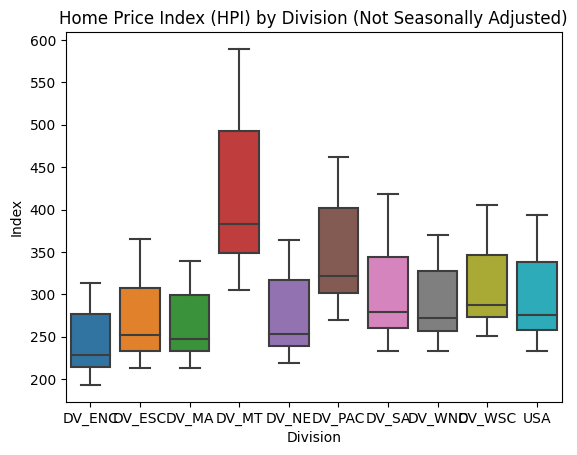

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot of Home Price Index (HPI) by division
sns.boxplot(x='division', y='index_po_not_seasonally_adjusted', data=df_filtered)
plt.title("Home Price Index (HPI) by Division (Not Seasonally Adjusted)")
plt.ylabel("Index")
plt.xlabel("Division")
plt.show()


### EDA: HPI Over Time

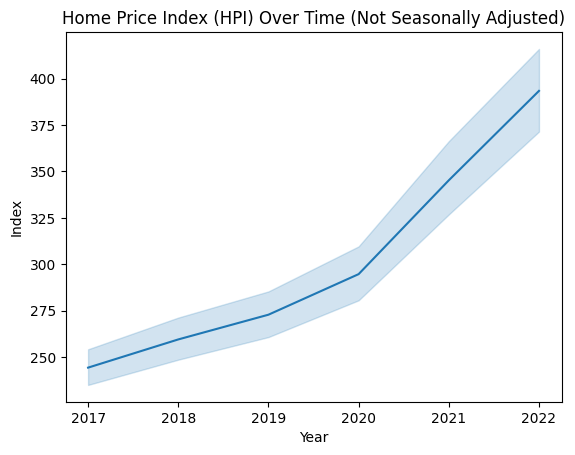

In [ ]:
sns.lineplot(x='year', y='index_po_not_seasonally_adjusted', data=df_filtered)
plt.title("Home Price Index (HPI) Over Time (Not Seasonally Adjusted)")
plt.ylabel("Index")
plt.xlabel("Year")
plt.show()

### EDA: Seasonal Trends in HPI

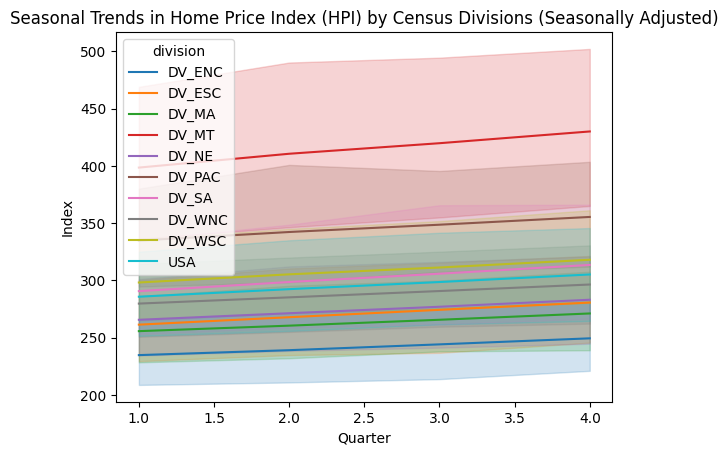

In [ ]:
sns.lineplot(x='qtr', y='index_po_seasonally_adjusted', hue='division', data=df_filtered)
plt.title("Seasonal Trends in Home Price Index (HPI) by Census Divisions (Seasonally Adjusted)")
plt.xlabel("Quarter")
plt.ylabel("Index")
plt.show()

### EDA: Yearly Trends in HPI

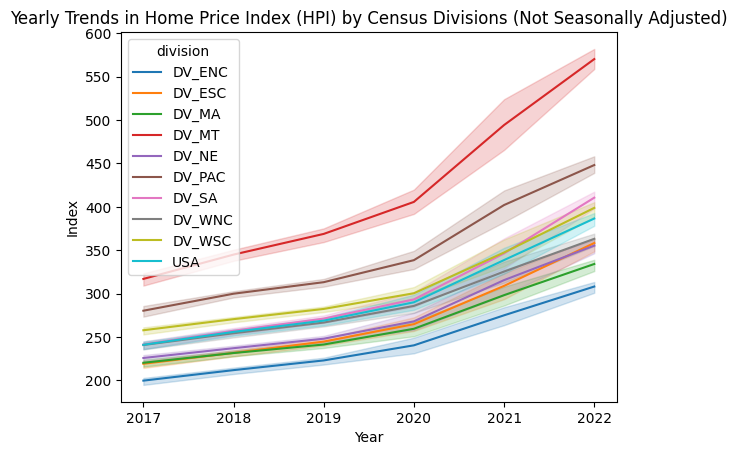

In [ ]:
sns.lineplot(x='year', y='index_po_not_seasonally_adjusted', hue='division', data=df_filtered)
plt.title("Yearly Trends in Home Price Index (HPI) by Census Divisions (Not Seasonally Adjusted)")
plt.xlabel("Year")
plt.ylabel("Index")
plt.show()

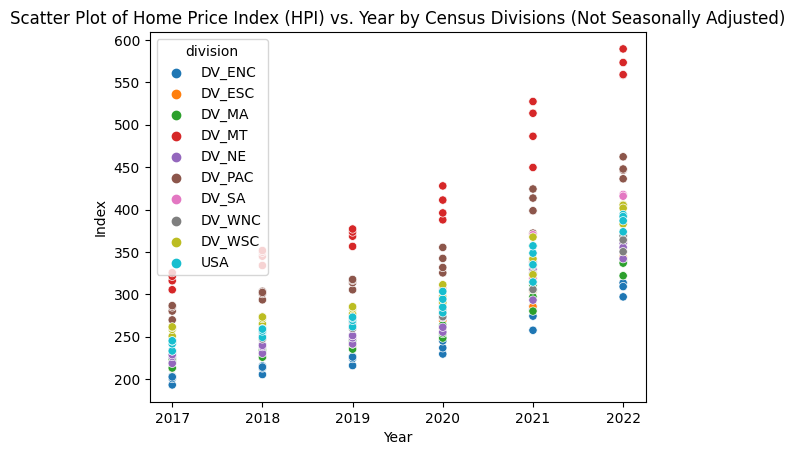

In [ ]:
sns.scatterplot(x='year', y='index_po_not_seasonally_adjusted', hue='division', data=df_filtered)
plt.title("Scatter Plot of Home Price Index (HPI) vs. Year by Census Divisions (Not Seasonally Adjusted)")
plt.xlabel("Year")
plt.ylabel("Index")
plt.show()

## Freddie Mac - 30 Year USA Loan Data

### **What Does it Represent**

Historical data related to 30-year fixed rate mortgages (FRMs) that are owned or guaranteed by Freddie Mac. 

### **Based on Weekly Data**
Shows both the date which increases at a 7 day rate along with the interest rate for that time period. 

In [ ]:
# Specify the file path of the data file in Google Drive
file_path = '/content/drive/MyDrive/School/MSDS-498 Capstone/Data/fred.csv'  

# Read the data into a pandas DataFrame
fred_df = pd.read_csv(file_path) 

In [ ]:
fred_df.head()

,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [ ]:
fred_df['DATE'] = pd.to_datetime(fred_df['DATE'])

start_date = pd.to_datetime('2017-01-01')
end_date = pd.to_datetime('2022-12-31')

fred_df_clean = fred_df[(fred_df['DATE'] >= start_date) & (fred_df['DATE'] <= end_date)]

fred_df_clean

,DATE,MORTGAGE30US
2388,2017-01-05,4.20
2389,2017-01-12,4.12
2390,2017-01-19,4.09
2391,2017-01-26,4.19
2392,2017-02-02,4.19
...,...,...
2696,2022-12-01,6.49
2697,2022-12-08,6.33
2698,2022-12-15,6.31
2699,2022-12-22,6.27


In [ ]:
fred_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 2388 to 2700
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          313 non-null    datetime64[ns]
 1   MORTGAGE30US  313 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.3 KB


In [ ]:
fred_df_clean.isnull().sum()

DATE            0
MORTGAGE30US    0
dtype: int64

In [ ]:
### Stats of the Mortgage Rates

fred_df_clean['MORTGAGE30US'].describe()

count    313.000000
mean       3.977827
std        0.951631
min        2.650000
25%        3.140000
50%        3.900000
75%        4.460000
max        7.080000
Name: MORTGAGE30US, dtype: float64

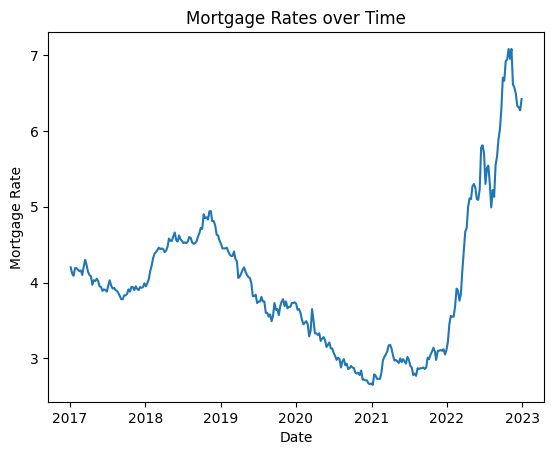

In [ ]:
### Creating a line chart to visualize mortgage rates over time

plt.plot(fred_df_clean['DATE'], fred_df_clean['MORTGAGE30US'])  
plt.xlabel('Date')
plt.ylabel('Mortgage Rate')
plt.title('Mortgage Rates over Time')
plt.show()

## Redfin County Data (based on housing market for new listings, days to close, etc.)

### What Does it Represent

...

### What's in the Data

**Age of inventory** \
Median days that all active properties have been on the market during a given time period. So the median of the (last day of the period minus the listing aded date), so long as the days active is less than one year and at least 1 day.

**Average price drop ratio** \
The average of the ratio between the current list price and the original list price. An average price drop ratio of 5% means active listings have dropped their price by 5% of their original list price on average.

**Average sale to list** \
The mean ratio of each homes sale price divided by their list price covering all homes with a sale date during a given time period. Excludes properties with a sale price 50%

**Above the listing price** \
or with a sale price 50% below the list price.

**Home sales** \
Total number of homes with a sale date during a given time period.

**Homes delisted** \
The total number of homes that were pulled off the market during a given time period.

**Inventory** \
Total number of active listings on the last day a given time period.

**Median active list ppsf** \
The median list price per square foot of all active listings.

**Median active list price** \
The median list price of all active listings.

**Median active listings** \
The median of how many listings were active on each day within a given time period.

**Median days on market** \
The number of days between the date the home was listed for sale and when the home went off-market/pending sale covering all homes with an off-market date during a given time period where 50% of the off-market homes sat longer on the market and 50% went off the market faster. Excludes homes that sat on the market for more than 1 year.

**Median days to close** \
The median number of days a home takes to go from pending to sold.

**Median list price** \
The most recent listing price covering all homes with a listing date during a given time period where 50% of the active listings were above this price and 50% were below this price.

**Median list price per square foot** \
The most recent listing price divided by the total square feet of the property (not the lot) covering all homes with a listing date during a given time period where 50% of the active listings were above this price per sqft and 50% were below this price per sqft.

**Median listing with price drops** \
The median of how many listings were active on each day and whose current list price is less than the original list price within a given time period.

**Median sale price** \
The final home sale price covering all homes with a sale date during a given time period where 50% of the sales were above this price and 50% were below this price.

**Median sale price per square foot** \
The final home sale price divided by the total square feet of the property (not the lot) covering all homes with a sale date during a given time period where 50% of the sales were above this price per sqft and 50% were below this price per sqft.

**Months of supply** \
When data are monthly, it is inventory divided by home sales. This tells you how long it would take supply to be bought up if no new homes came on the market.

**New listings** \
Total number of homes with a listing added date during a given time period.

**Off market in two weeks** \
The total number of homes that went under contract within two weeks of their listing date.

**Pending home sales** \
Total homes that went under contract during the period. Excludes homes that were on the market longer than 90 days.

**Percent active listings delisted** \
The share of active listings that were pulled off the market during a given time period.

**Percent of median active listings with price drops** \
The share of median active listings that dropped their pice in a given time period

**Percent of total active listings with price drops** \
The share of total active listings that dropped their price in a given time period.

**Percent off market in two weeks** \
The share of pending sales that went under contract within two weeks of their listing date.

**Percent total homes sold with price drops** \
The share of homes with a sale date during a given time period where the sale price is less th an the lastest listing price.

**Price drops** \
How many listings dropped their price in a given time period.

**Sold above list** \
The percent of homes sales with a sale price greater than their latest list price covering all homes with a sale date during a given time period. Excludes properties with a sale price 50% above the listing price or with a sale price 50% below the list price.

**Total active listings** \
The total number of listings that were active at any point during a given time period.

**Total homes sold with price drops** \
The total number of homes with a sale date during a given time period and where the sale price is less than the latest listing price.

In [ ]:
# Specify the file path of the data file in Google Drive
file_path = '/content/drive/MyDrive/School/MSDS-498 Capstone/Data/redfin.tsv000'  

# Read the data into a pandas DataFrame
county_df = pd.read_csv(file_path, sep='\t') 

In [ ]:
county_df.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2017-12-01,2017-12-31,30,county,5,396,f,"Larimer County, CO",NaN,Colorado,...,-0.190476,NaN,NaN,NaN,0.00,-0.333333,0.000000,"Fort Collins, CO",22660.0,2023-03-19 14:55:16
1,2017-09-01,2017-09-30,30,county,5,1515,f,"Winona County, MN",NaN,Minnesota,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Winona, MN",49100.0,2023-03-19 14:55:16
2,2022-04-01,2022-04-30,30,county,5,949,f,"Henry County, IA",NaN,Iowa,...,-0.044444,NaN,NaN,NaN,0.00,-0.142857,0.000000,Iowa nonmetropolitan area,NaN,2023-03-19 14:55:16
3,2012-03-01,2012-03-31,30,county,5,2396,f,"Lancaster County, PA",NaN,Pennsylvania,...,0.075000,NaN,NaN,NaN,0.25,-0.550000,-0.083333,"Lancaster, PA",29540.0,2023-03-19 14:55:16
4,2020-08-01,2020-08-31,30,county,5,1036,f,"Gove County, KS",NaN,Kansas,...,NaN,NaN,NaN,NaN,0.00,NaN,NaN,Kansas nonmetropolitan area,NaN,2023-03-19 14:55:16


In [ ]:
county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849760 entries, 0 to 849759
Data columns (total 58 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   period_begin                    849760 non-null  object 
 1   period_end                      849760 non-null  object 
 2   period_duration                 849760 non-null  int64  
 3   region_type                     849760 non-null  object 
 4   region_type_id                  849760 non-null  int64  
 5   table_id                        849760 non-null  int64  
 6   is_seasonally_adjusted          849760 non-null  object 
 7   region                          849760 non-null  object 
 8   city                            0 non-null       float64
 9   state                           849760 non-null  object 
 10  state_code                      849760 non-null  object 
 11  property_type                   849760 non-null  object 
 12  property_type_id

In [ ]:
county_df.isnull().sum()

period_begin                           0
period_end                             0
period_duration                        0
region_type                            0
region_type_id                         0
table_id                               0
is_seasonally_adjusted                 0
region                                 0
city                              849760
state                                  0
state_code                             0
property_type                          0
property_type_id                       0
median_sale_price                    806
median_sale_price_mom              88424
median_sale_price_yoy             118805
median_list_price                  73841
median_list_price_mom             137508
median_list_price_yoy             167136
median_ppsf                        10472
median_ppsf_mom                    96683
median_ppsf_yoy                   127088
median_list_ppsf                   75253
median_list_ppsf_mom              138945
median_list_ppsf

In [ ]:
county_df[['period_begin', 'period_end']].values.min()

'2012-01-01'

In [ ]:
county_df[['period_begin', 'period_end']].values.max()

'2023-02-28'

## BLS Unemployment Data

In [5]:
# Specify the file path of the data file in Google Drive
file_path = '/content/drive/MyDrive/School/MSDS-498 Capstone/Data/bls_emp.csv'  
# Read the data into a pandas DataFrame
bls_df = pd.read_csv(file_path) 

In [6]:
bls_df.head(10)

,LAUS,State FIPS,County FIPS,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment Rate
0,CN0100100000000,1.0,1.0,"Autauga County, AL",2022.0,"26,789","26,181",608,2.3
1,CN0100300000000,1.0,3.0,"Baldwin County, AL",2022.0,"102,849","100,432","2,417",2.4
2,CN0100500000000,1.0,5.0,"Barbour County, AL",2022.0,"8,241","7,906",335,4.1
3,CN0100700000000,1.0,7.0,"Bibb County, AL",2022.0,"8,726","8,507",219,2.5
4,CN0100900000000,1.0,9.0,"Blount County, AL",2022.0,"25,796","25,222",574,2.2
5,CN0101100000000,1.0,11.0,"Bullock County, AL",2022.0,"4,554","4,426",128,2.8
6,CN0101300000000,1.0,13.0,"Butler County, AL",2022.0,"8,804","8,503",301,3.4
7,CN0101500000000,1.0,15.0,"Calhoun County, AL",2022.0,"46,140","44,741","1,399",3.0
8,CN0101700000000,1.0,17.0,"Chambers County, AL",2022.0,"15,933","15,523",410,2.6
9,CN0101900000000,1.0,19.0,"Cherokee County, AL",2022.0,"11,696","11,422",274,2.3


In [11]:
bls_df.describe()

,State FIPS,County FIPS,Year,Unemployment Rate
count,3220.000000,3220.000000,3220.0,3220.000000
mean,31.286646,102.879503,2022.0,3.680528
std,16.282860,106.647794,0.0,1.370622
min,1.000000,1.000000,2022.0,0.600000
25%,19.000000,35.000000,2022.0,2.700000
50%,30.000000,79.000000,2022.0,3.400000
75%,46.000000,133.000000,2022.0,4.300000
max,72.000000,840.000000,2022.0,14.700000


In [7]:
bls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3223 entries, 0 to 3222
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LAUS                            3222 non-null   object 
 1   State FIPS                      3220 non-null   float64
 2   County FIPS                     3220 non-null   float64
 3   County Name/State Abbreviation  3220 non-null   object 
 4   Year                            3220 non-null   float64
 5   Labor Force                     3220 non-null   object 
 6   Employed                        3220 non-null   object 
 7   Unemployed                      3220 non-null   object 
 8   Unemployment Rate               3220 non-null   float64
dtypes: float64(4), object(5)
memory usage: 226.7+ KB


In [15]:
bls_df.isnull().sum()

LAUS                              1
State FIPS                        3
County FIPS                       3
County Name/State Abbreviation    3
Year                              3
Labor Force                       3
Employed                          3
Unemployed                        3
Unemployment Rate                 3
dtype: int64

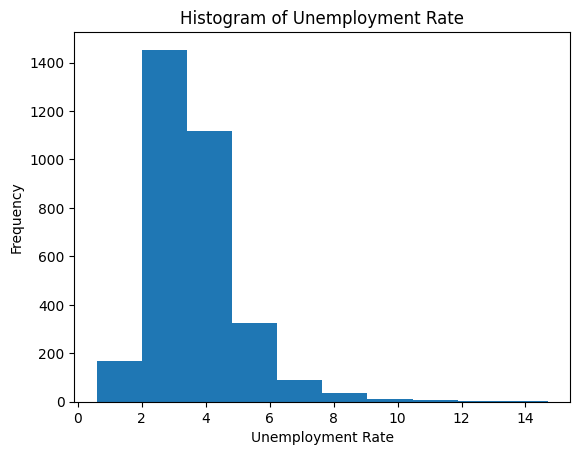

In [13]:
# histogram of the unemployment rate

import matplotlib.pyplot as plt

plt.hist(bls_df['Unemployment Rate'])
plt.title('Histogram of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Scatter plot of labor force vs. unemployment rate
x = bls_df['Labor Force'].astype(float) 
y = bls_df['Unemployment Rate'].astype(float)
plt.scatter(x, y)
plt.title('Scatter Plot of Labor Force vs. Unemployment Rate')
plt.xlabel('Labor Force')
plt.ylabel('Unemployment Rate')
plt.show()

ValueError: ignored

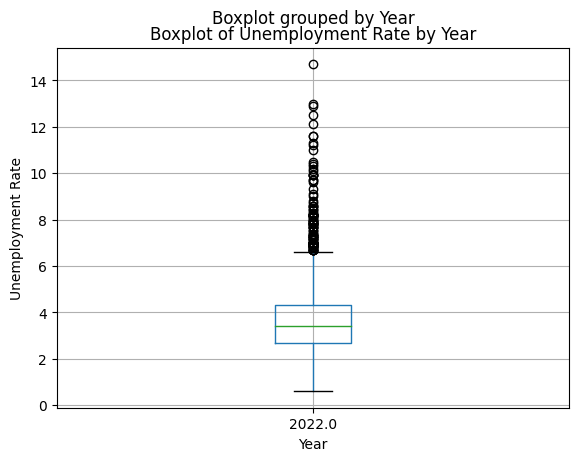

In [16]:
# Boxplot of unemployment rate by year
bls_df.boxplot(column='Unemployment Rate', by='Year')
plt.title('Boxplot of Unemployment Rate by Year')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.show()

## EXTRAS - BLS Data

In [ ]:
import requests
import json
import csv

# Specify the BLS API endpoint and parameters
base_url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
series_id = "LNS11000000"  # Consumer Price Index - All Urban Consumers (CPI-U)
start_year = 2017  # Start year for data retrieval
end_year = 2022  # End year for data retrieval
api_key = "f1502422b7d64bc6b8c84d16cca7f014"

# Specify output CSV file name
output_file = "cpi_data.csv"

# Specify CSV header
header = ["Year", "Month", "Value"]

# Open CSV file in write mode
with open(output_file, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header)

    # Loop through years and months to retrieve data
    for year in range(start_year, end_year + 1):
        for month in range(1, 13):
            # Specify the series ID with year, month, and other parameters
            query_params = {
                "seriesid": series_id,
                "startyear": str(year),
                "endyear": str(year),
                "startperiod": f"M{month:02d}",
                "endperiod": f"M{month:02d}",
                "registrationkey": api_key,
            }

            # Send GET request to BLS API
            response = requests.get(base_url, params=query_params)

            # Check for successful response
            if response.status_code == 200:
                # Parse JSON response
                data = json.loads(response.text)

                # Extract CPI data from response
                for result in data['Results']['series']:
                    series_id = result['seriesID']
                    for data_point in result['data']:
                        year = data_point['year']
                        period = data_point['period']
                        value = data_point['value']

                        # Write CPI data to CSV
                        writer.writerow([year, period, value])
            else:
                print(f"Error: {response.status_code} - {response.text}")

print(f"Data has been saved to {output_file}")


Error: 405 - <!doctype html><html lang="en"><head><title>HTTP Status 405 – Method Not Allowed</title><style type="text/css">body {font-family:Tahoma,Arial,sans-serif;} h1, h2, h3, b {color:white;background-color:#525D76;} h1 {font-size:22px;} h2 {font-size:16px;} h3 {font-size:14px;} p {font-size:12px;} a {color:black;} .line {height:1px;background-color:#525D76;border:none;}</style></head><body><h1>HTTP Status 405 – Method Not Allowed</h1><hr class="line" /><p><b>Type</b> Status Report</p><p><b>Message</b> Request method &#39;GET&#39; not supported</p><p><b>Description</b> The method received in the request-line is known by the origin server but not supported by the target resource.</p><hr class="line" /><h3>VMware tc Runtime 8.5.85.A.RELEASE</h3></body></html>
Error: 405 - <!doctype html><html lang="en"><head><title>HTTP Status 405 – Method Not Allowed</title><style type="text/css">body {font-family:Tahoma,Arial,sans-serif;} h1, h2, h3, b {color:white;background-color:#525D76;} h1 {f

In [ ]:
import requests
import json
import pandas as pd

# Specify the API endpoint and parameters
api_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'
api_key = 'f1502422b7d64bc6b8c84d16cca7f014'  
series_code = 'LNS11000000'
start_year = 2017
end_year = 2022

# Define headers with API key
headers = {'Content-Type': 'application/json'}
params = {
    'startyear': start_year,
    'endyear': end_year,
    'seriesid': [series_code],
    'registrationkey': api_key
}

# Make API request
response = requests.post(api_url, headers=headers, json=params)

# Check if request is successful
if response.status_code == 200:
    # Load JSON response
    data = json.loads(response.content.decode())

    # Extract data from response
    series_data = data['Results']['series'][0]
    series_id = series_data['seriesID']
    series_values = series_data['data']

    # Convert data to DataFrame
    df = pd.DataFrame(series_values)

    # Convert date column to datetime format
    df['year'] = pd.to_datetime(df['year'], format='%Y')
    df.set_index('year', inplace=True)

    print(f"Data for series ID '{series_id}' retrieved successfully!")
    print(df.head())
else:
    print(f"Failed to fetch data: {response.status_code} - {response.reason}")


Data for series ID 'LNS11000000' retrieved successfully!
           period periodName   value footnotes
year                                          
2022-01-01    M12   December  164966      [{}]
2022-01-01    M11   November  164527      [{}]
2022-01-01    M10    October  164646      [{}]
2022-01-01    M09  September  164619      [{}]
2022-01-01    M08     August  164714      [{}]


### BLS Pulls for QCEW Datasets

In [ ]:
import urllib.request
import csv

# qcewCreateDataRows : This function takes a raw csv string and splits it into
# a two-dimensional array containing the data and the header row of the csv file
# a try/except block is used to handle for both binary and char encoding
def qcewCreateDataRows(csv):
    dataRows = []
    try: dataLines = csv.decode().split('\r\n')
    except er: dataLines = csv.split('\r\n')
    for row in dataLines:
        dataRows.append(row.split(','))
    return dataRows


# qcewGetAreaData : This function takes a year, quarter, and area argument and
# returns an array containing the associated area data. Use 'a' for annual
# averages. 
# For all area codes and titles see:
# http://www.bls.gov/cew/doc/titles/area/area_titles.htm
def qcewGetAreaData(year,qtr,area):
    urlPath = "http://data.bls.gov/cew/data/api/[YEAR]/[QTR]/area/[AREA].csv"
    urlPath = urlPath.replace("[YEAR]",year)
    urlPath = urlPath.replace("[QTR]",qtr.lower())
    urlPath = urlPath.replace("[AREA]",area.upper())
    httpStream = urllib.request.urlopen(urlPath)
    csv = httpStream.read()
    httpStream.close()
    return qcewCreateDataRows(csv)


# Loop through all states and write data to CSV file
states = ['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'fl', 'ga', 'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma', 'mi', 'mn', 'ms', 'mo', 'mt', 'ne', 'nv', 'nh', 'nj', 'nm', 'ny', 'nc', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy']

with open('qcew_data.csv', mode='w', newline='') as data_file:
    data_writer = csv.writer(data_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    # Write header row
    header_row = ['state', 'area_fips', 'own_code', 'industry_code', 'year', 'qtr', 'disclosure_code', 'annual_avg_estabs', 'annual_avg_emplvl', 'total_annual_wages']
    data_writer.writerow(header_row)
    
    # Loop through all states
    for state in states:
        for year in range(2017, 2023):
            for qtr in ['q1', 'q2', 'q3', 'q4']:
                try:
                    state_data = qcewGetAreaData(str(year), qtr, state)
                    for row in state_data[1:]:
                        data_writer.writerow([state.upper(), row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8]])
                except urllib.error.HTTPError as e:
                    # If the API call returns an HTTPError, assume that the data is not available for that state/year/quarter
                    print(f"No data")


No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data
No data


KeyboardInterrupt: ignored